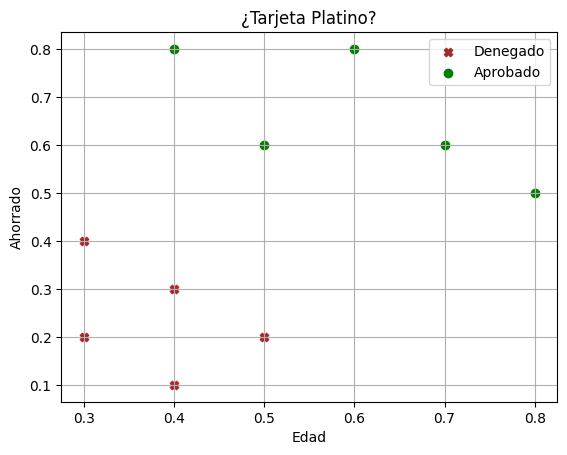

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Datos de 10 personas -> [edad, ahorrado]
personas = np.array([[.3, .4], [.4, .3],
                     [.3,.2], [.4,.1],
                     [.5,.2], [.4, .8],
                     [.6,.8], [.5, .6],
                     [.7, .6], [.8, .5]])
# [.3, .4] = 30 años, $40,000 ahorrados

# 1 : aprobado, 0 : denegado
clases = np.array([0,0,0,0,0,1,1,1,1,1])

# Mapa de colores personalizado
cmap = mcolors.ListedColormap(['brown', 'green'])

# Hacemos un gráfico de dispersión
plt.figure()

# Grafica denegados con 'X'
plt.scatter(personas[clases == 0, 0], personas[clases == 0, 1], c='brown', marker='X', label='Denegado')

# Grafica aprobados con 'o'
plt.scatter(personas[clases == 1, 0], personas[clases == 1, 1], c='green', marker='o', label='Aprobado')

plt.title('¿Tarjeta Platino?')
plt.xlabel('Edad')
plt.ylabel('Ahorrado')
plt.grid()

# Añadir leyenda
plt.legend()

plt.show()


In [36]:
import numpy as np

# Definir la función de activación escalón
def funcion_escalon(x):
    return 1 if x >= 0 else 0

# Crear un vector de pesos aleatorio con valores entre -1 y 1
pesos = np.random.uniform(-1, 1, 2)

# Definir un umbral aleatorio con valor entre -1 y 1
umbral = np.random.uniform(-1, 1)

# Definir las nuevas personas a probar
nuevas_personas = np.array([[0.1, 0.7], [0.6, 0.8]])

# Función para clasificar a las nuevas personas
def clasificar_persona(persona, pesos, umbral):
    suma_ponderada = np.dot(persona, pesos) - umbral # Producto punto entre la persona y los pesos
    return funcion_escalon(suma_ponderada)

# Clasificar a las nuevas personas
clasificaciones = [clasificar_persona(persona, pesos, umbral) for persona in nuevas_personas]

# Imprimir resultados
for i, persona in enumerate(nuevas_personas):
    resultado = "Aprobada" if clasificaciones[i] == 1 else "Denegada"
    print(f"Persona {i+1} (edad: {persona[0]}, ahorrado: {persona[1]}): {resultado}")

# Mostrar pesos y umbral utilizados
print(f"Pesos utilizados: {pesos}")
print(f"Umbral utilizado: {umbral}")


Persona 1 (edad: 0.1, ahorrado: 0.7): Denegada
Persona 2 (edad: 0.6, ahorrado: 0.8): Denegada
Pesos utilizados: [0.31749864 0.57340453]
Umbral utilizado: 0.6574308233690211


In [68]:
import numpy as np

# Datos de entrenamiento -> [edad, ahorrado]
personas = np.array([[.3, .4], [.4, .3],
                     [.3, .2], [.4, .1],
                     [.5, .2], [.4, .8],
                     [.6, .8], [.5, .6],
                     [.7, .6], [.8, .5]])

# Etiquetas de las clases: 1 = aprobado, 0 = denegado
clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Función de activación escalón
def funcion_escalon(x):
    return 1 if x >= 0 else 0

# Perceptrón
class Perceptron:
    def __init__(self, num_entradas, tasa_aprendizaje=0.1, num_iteraciones=1000):
        self.tasa_aprendizaje = tasa_aprendizaje
        self.num_iteraciones = num_iteraciones
        self.pesos = np.random.uniform(-1, 1, num_entradas)
        self.umbral = np.random.uniform(-1, 1)

    def entrenar(self, datos, etiquetas):
        for _ in range(self.num_iteraciones):
            for x, etiqueta in zip(datos, etiquetas):
                prediccion = funcion_escalon(np.dot(x, self.pesos) - self.umbral)
                error = etiqueta - prediccion
                self.pesos += self.tasa_aprendizaje * error * x
                self.umbral -= self.tasa_aprendizaje * error

    def predecir(self, x):
        suma_ponderada = np.dot(x, self.pesos) - self.umbral
        return funcion_escalon(suma_ponderada)

# Crear y entrenar el perceptrón
perceptron = Perceptron(num_entradas=2)
perceptron.entrenar(personas, clases)

# Definir las nuevas personas a probar
nuevas_personas = np.array([[0.5, 0.5], [0.1, 0.7], [0.6, 0.8]])

# Clasificar a las nuevas personas
clasificaciones = [perceptron.predecir(persona) for persona in nuevas_personas]

# Imprimir resultados
for i, persona in enumerate(nuevas_personas):
    resultado = "Aprobada" if clasificaciones[i] == 1 else "Denegada"
    print(f"Persona {i+1} (edad: {persona[0]}, ahorrado: {persona[1]}): {resultado}")

# Mostrar pesos y umbral utilizados
print(f"Pesos finales: {perceptron.pesos}")
print(f"Umbral final: {perceptron.umbral}")


Persona 1 (edad: 0.5, ahorrado: 0.5): Aprobada
Persona 2 (edad: 0.1, ahorrado: 0.7): Aprobada
Persona 3 (edad: 0.6, ahorrado: 0.8): Aprobada
Pesos finales: [-0.07780216  0.57572073]
Umbral final: 0.22478817226520145


In [1]:
import numpy as np
from sklearn.linear_model import Perceptron

# Datos de entrenamiento -> [edad, ahorrado]
personas = np.array([[.3, .4], [.4, .3],
                     [.3, .2], [.4, .1],
                     [.5, .2], [.4, .8],
                     [.6, .8], [.5, .6],
                     [.7, .6], [.8, .5]])
# [.3, .4] = 30 años, $40,000 ahorrados

# Etiquetas de las clases: 1 = aprobado, 0 = denegado
clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Crear y entrenar el perceptrón
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=0)
perceptron.fit(personas, clases)

# Definir las nuevas personas a probar
nuevas_personas = np.array([[0.5, 0.5], [0.1, 0.7], [0.6, 0.8]])

# Clasificar a las nuevas personas
clasificaciones = perceptron.predict(nuevas_personas)

# Imprimir resultados
for i, persona in enumerate(nuevas_personas):
    resultado = "Aprobada" if clasificaciones[i] == 1 else "Denegada"
    print(f"Persona {i+1} (edad: {persona[0]}, ahorrado: {persona[1]}): {resultado}")

# Mostrar pesos y umbral utilizados
print(f"Pesos finales: {perceptron.coef_}")
print(f"Umbral final: {perceptron.intercept_}")


Persona 1 (edad: 0.5, ahorrado: 0.5): Aprobada
Persona 2 (edad: 0.1, ahorrado: 0.7): Denegada
Persona 3 (edad: 0.6, ahorrado: 0.8): Aprobada
Pesos finales: [[1.1 1. ]]
Umbral final: [-1.]
